# TASK 4: SENTIMENT ANALYSIS

The task here is to analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

The dataset used here is twitter review from kaggle.

https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from nltk.corpus import stopwords
import string
%matplotlib inline

In [4]:
data=pd.read_csv("C:\\Users\\Larren\\Downloads\\prodigy\\data 4\\twitter_training.csv",names=['Tweet_ID','entity','sentiment','Tweet_content'])
data

,Tweet_ID,entity,sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
data.describe(include='all')

,Tweet_ID,entity,sentiment,Tweet_content
count,74682.000000,74682,74682,73996
unique,NaN,32,4,69491
top,NaN,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,NaN,2400,22542,172
mean,6432.586165,NaN,NaN,NaN
std,3740.427870,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [7]:
data.isnull().sum()

Tweet_ID           0
entity             0
sentiment          0
Tweet_content    686
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.loc[data['sentiment'] == 'Irrelevant', 'sentiment'] = 'Neutral'

In [17]:
data

,Tweet_ID,entity,sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


# EDA

<Axes: xlabel='sentiment', ylabel='count'>

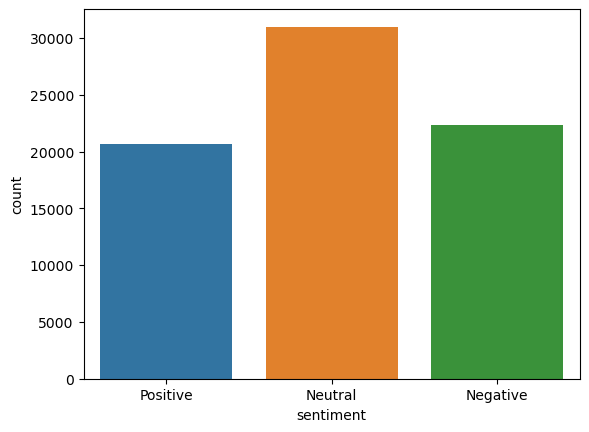

In [34]:
sns.countplot(x='sentiment',data=data)

In [20]:
from wordcloud import WordCloud

(-0.5, 199.5, 99.5, -0.5)

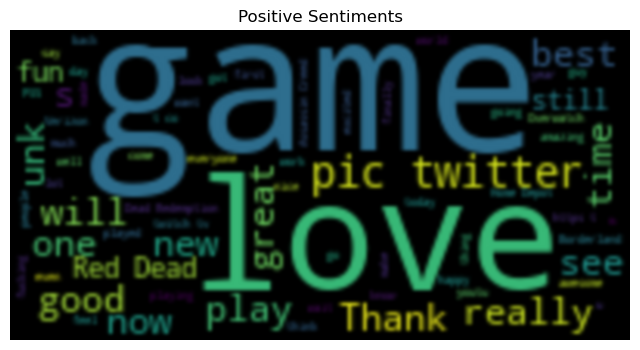

In [38]:
positive_tweets=data[data['sentiment']=='Positive']
positive_text = ''.join(positive_tweets['Tweet_content'])
wordcloud=WordCloud(width=200,height=100).generate(positive_text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bicubic')
plt.title('Positive Sentiments')
plt.axis('off')

(-0.5, 199.5, 99.5, -0.5)

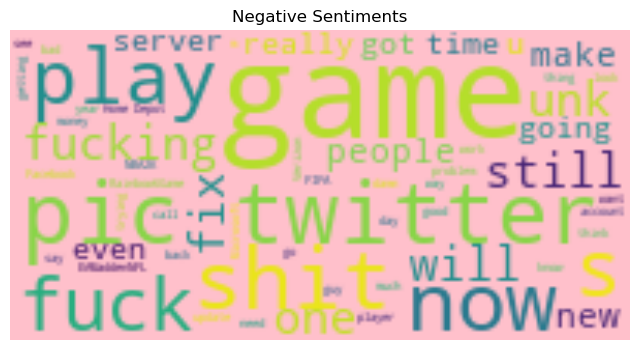

In [40]:
negative_tweets=data[data['sentiment']=='Negative']
negative_text = ''.join(negative_tweets['Tweet_content'])
wordcloud=WordCloud(width=200,height=100,background_color='pink').generate(negative_text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Negative Sentiments')
plt.axis('off')

(-0.5, 199.5, 99.5, -0.5)

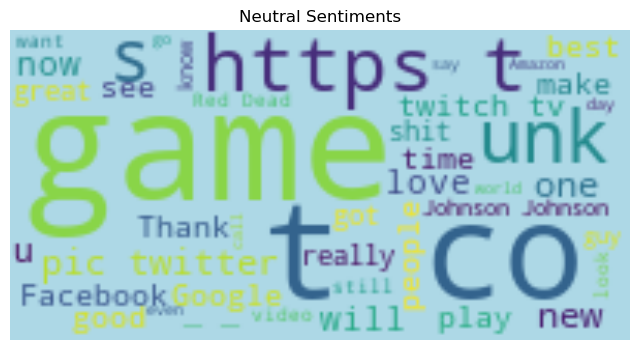

In [42]:
neutral_tweets=data[data['sentiment']=='Neutral']
neutral_text = ''.join(neutral_tweets['Tweet_content'])
wordcloud=WordCloud(width=200,height=100,background_color='lightblue').generate(neutral_text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Neutral Sentiments')
plt.axis('off')

In [15]:
data['entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [46]:
import plotly.express as px

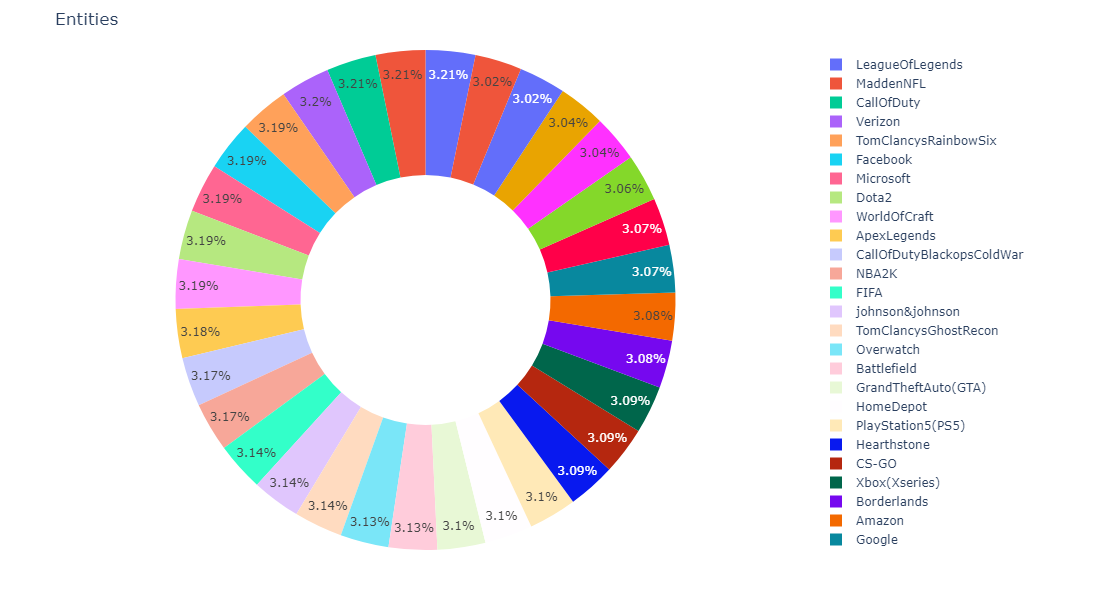

In [58]:
fig=px.pie(data,names='entity',hole=0.5,title='Entities')
fig.update_layout(autosize=False,width=800,height=600,margin=dict(l=50,r=50,t=50,b=50))

In [83]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [68]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
def text_process(content):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in content if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [87]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

## using bag of words(bow) method

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data['Tweet_content'],data['sentiment'], test_size=0.33, random_state=42)

In [53]:
pipeline= Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [55]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002C0F7B57BA0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [60]:
prediction=pipeline.predict(X_test)

In [74]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

    Negative       0.79      0.80      0.80      7271
     Neutral       0.77      0.87      0.82     10385
    Positive       0.86      0.68      0.76      6763

    accuracy                           0.80     24419
   macro avg       0.81      0.78      0.79     24419
weighted avg       0.80      0.80      0.80     24419



# INFERENCE

The model has overall accuracy of 80% which means it has done reasonable perfomance.

There are more reviews that are neutal in termns of precision,recall and F1-Score than in positive and negative reviews.